In [359]:
import numpy as np
import pandas as pd
import re

In [360]:
#importing files
data = pd.read_csv("/content/chipotle.tsv",sep='\t')
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


1.Missing Values:


In [361]:
#finding missing values
data.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [362]:
#data shape
data.shape

(4622, 5)

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [364]:
# Removing $ symbol and converting to numeric
data['item_price'] = data['item_price'].str.replace('$', '').astype(float)
data.head()

<ipython-input-364-82c2cc27e3cd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['item_price'] = data['item_price'].str.replace('$', '').astype(float)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [365]:
#data types
data.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [366]:
#filling the missing values with "UNKONWN"
data['choice_description']=data.choice_description.fillna('Unknown')
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,Unknown,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,Unknown,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [367]:
data.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

2. Data Types:


In [368]:
data.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

3. Duplicated Entries:

In [369]:
#Finfing duplicated entries
duplicate_entry = data[data.duplicated()]
print(duplicate_entry)

      order_id  quantity                            item_name  \
238        103         1                        Steak Burrito   
248        108         1                          Canned Soda   
297        129         1                        Steak Burrito   
381        165         1                    Canned Soft Drink   
484        205         1                         Chicken Bowl   
567        233         1                    Canned Soft Drink   
617        254         1                                Chips   
684        282         1                    Canned Soft Drink   
773        319         1                         Chicken Bowl   
908        376         1                        Steak Burrito   
924        381         1                   Chicken Soft Tacos   
1003       412         1                        Bottled Water   
1117       462         1                      Chicken Burrito   
1203       491         1                      Chicken Burrito   
1245       507         1 

In [370]:
#Dropping all duplicated entries
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [371]:
data.shape

(4563, 5)

4. Quantity and Item Price:


In [372]:
data[['quantity','item_price']].dtypes

quantity        int64
item_price    float64
dtype: object

In [373]:
print("unique QUANTITY : ",(data['quantity'].unique()))
print("\nunique ITEM PRICE : ",(data['item_price'].unique()))

unique QUANTITY :  [ 1  2  3  4  5 15  7  8 10]

unique ITEM PRICE :  [ 2.39  3.39 16.98 10.98  1.69 11.75  9.25  4.45  8.75 11.25  8.49  2.18
  8.99  1.09  2.95  2.15  3.99 22.5  11.48 17.98 17.5   4.3   5.9   1.25
 23.78  6.49 11.08  1.5  22.16 32.94 22.2  10.58  2.5  23.5   7.4  18.5
  3.    6.78 11.89  9.39  4.    3.75  8.69  2.29  8.9   3.27  3.89  8.19
 35.   27.75 11.8   6.   26.25 21.96  4.36  7.5   4.78 13.35  6.45  5.07
 22.96  7.17  7.98  4.5  26.07 12.98 35.25 44.25 10.5  33.75 16.38 13.52
  5.   15.    8.5  17.8   1.99 11.49]


In [374]:
data[['quantity','item_price']].isnull().sum()

quantity      0
item_price    0
dtype: int64

In [375]:
(data['quantity']<0).any().sum()

0

In [376]:
data[['quantity','item_price']].describe()


,quantity,item_price
count,4563.000000,4563.000000
mean,1.076704,7.490083
std,0.412739,4.244155
min,1.000000,1.090000
25%,1.000000,3.750000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [377]:
data['item_price'].describe()

count    4563.000000
mean        7.490083
std         4.244155
min         1.090000
25%         3.750000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

5. Choice Description:


In [378]:
data['choice_description']

0                                                 Unknown
1                                            [Clementine]
2                                                 [Apple]
3                                                 Unknown
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4563, dtype: object

In [379]:
data['choice_description']=data['choice_description'].str.replace('[','')
data['choice_description']=data['choice_description'].str.replace(']','')
data['choice_description']=data['choice_description'].str.replace('Unknown','none')

data.head()

<ipython-input-379-8bb1213b0fbe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['choice_description']=data['choice_description'].str.replace('[','')
<ipython-input-379-8bb1213b0fbe>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['choice_description']=data['choice_description'].str.replace(']','')


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,none,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,none,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98


In [380]:
add_choice = data['choice_description'].str.split(",", expand=True)


add_choice.columns = ['choice_1', 'choice_2', 'choice_3',
                         'choice_4', 'choice_5', 'choice_6',
                         'choice_7', 'choice_8', 'choice_9',
                         'choice_10']


new_choicecolumn = pd.concat([data, add_choice], axis=1)
new_choicecolumn.head()

,order_id,quantity,item_name,choice_description,item_price,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,choice_10
0,1,1,Chips and Fresh Tomato Salsa,none,2.39,none,None,None,None,None,None,None,None,None,None
1,1,1,Izze,Clementine,3.39,Clementine,None,None,None,None,None,None,None,None,None
2,1,1,Nantucket Nectar,Apple,3.39,Apple,None,None,None,None,None,None,None,None,None
3,1,1,Chips and Tomatillo-Green Chili Salsa,none,2.39,none,None,None,None,None,None,None,None,None,None
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98,Tomatillo-Red Chili Salsa (Hot),Black Beans,Rice,Cheese,Sour Cream,None,None,None,None,None


In [381]:
data = pd.merge(data, new_choicecolumn, on=['order_id', 'quantity', 'item_name', 'choice_description', 'item_price'], how='left')
data.head()

,order_id,quantity,item_name,choice_description,item_price,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,choice_10
0,1,1,Chips and Fresh Tomato Salsa,none,2.39,none,None,None,None,None,None,None,None,None,None
1,1,1,Izze,Clementine,3.39,Clementine,None,None,None,None,None,None,None,None,None
2,1,1,Nantucket Nectar,Apple,3.39,Apple,None,None,None,None,None,None,None,None,None
3,1,1,Chips and Tomatillo-Green Chili Salsa,none,2.39,none,None,None,None,None,None,None,None,None,None
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98,Tomatillo-Red Chili Salsa (Hot),Black Beans,Rice,Cheese,Sour Cream,None,None,None,None,None


In [382]:
data.shape

(4563, 15)

6. Handling Special Characters:


In [383]:
data['item_name'].describe()

count             4563
unique              50
top       Chicken Bowl
freq               717
Name: item_name, dtype: object

In [384]:
data['choice_description'] = data['choice_description'].str.replace('[^a-zA-Z0-9\s-]', ' ', regex=True)
data['choice_description'] = data['choice_description'].str.strip()
data['item_name'] = data['item_name'].str.strip()

In [386]:
data.replace('None', 'none', inplace=True)
data.head()

,order_id,quantity,item_name,choice_description,item_price,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,choice_10
0,1,1,Chips and Fresh Tomato Salsa,none,2.39,none,None,None,None,None,None,None,None,None,None
1,1,1,Izze,Clementine,3.39,Clementine,None,None,None,None,None,None,None,None,None
2,1,1,Nantucket Nectar,Apple,3.39,Apple,None,None,None,None,None,None,None,None,None
3,1,1,Chips and Tomatillo-Green Chili Salsa,none,2.39,none,None,None,None,None,None,None,None,None,None
4,2,2,Chicken Bowl,Tomatillo-Red Chili Salsa Hot Black Beans ...,16.98,Tomatillo-Red Chili Salsa (Hot),Black Beans,Rice,Cheese,Sour Cream,None,None,None,None,None


7. Order Id Integrity:


In [387]:
data.groupby('order_id')['item_name'].nunique().reset_index()


,order_id,item_name
0,1,4
1,2,1
2,3,2
3,4,2
4,5,2
...,...,...
1829,1830,2
1830,1831,3
1831,1832,2
1832,1833,1


8. Item Name Standardization:





In [388]:

data['item_name'] = data['item_name'].str.lower()
data['item_name'] = data['item_name'].str.strip()

print("Item Name :\n",data.item_name.value_counts())

Item Name :
 chicken bowl                             717
chicken burrito                          546
chips and guacamole                      474
steak burrito                            365
canned soft drink                        290
steak bowl                               210
chips                                    208
bottled water                            155
chicken soft tacos                       111
chips and fresh tomato salsa             110
chicken salad bowl                       110
canned soda                              102
side of chips                            101
veggie burrito                            95
barbacoa burrito                          90
veggie bowl                               85
carnitas bowl                             68
barbacoa bowl                             65
carnitas burrito                          59
steak soft tacos                          55
6 pack soft drink                         54
chicken crispy tacos                      

9. Quantity and Price Relationships:






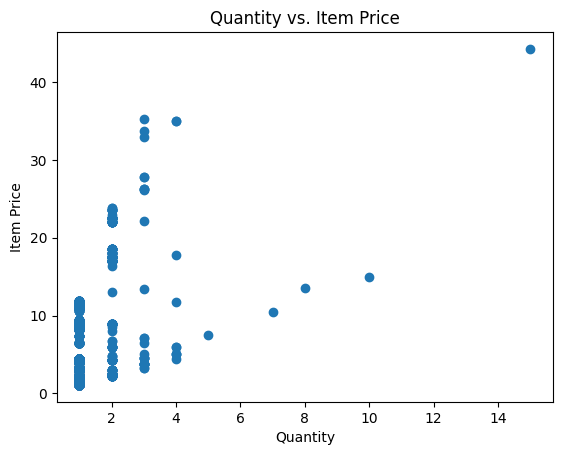

In [389]:
#total cost for each item based on quantity and price
data['total_cost']= data['quantity'] * data['item_price']

import matplotlib.pyplot as plt

plt.scatter(data['quantity'], data['item_price'])
plt.xlabel('Quantity')
plt.ylabel('Item Price')
plt.title('Quantity vs. Item Price')
plt.show()


10. Data Integrity Check:


In [390]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

unique_values_column = data['choice_description'].unique()
print("Unique Values in 'column_name':")
print(unique_values_column)


Missing Values:
order_id                 0
quantity                 0
item_name                0
choice_description       0
item_price               0
choice_1                 0
choice_2              1759
choice_3              1841
choice_4              2041
choice_5              2488
choice_6              3242
choice_7              3958
choice_8              4384
choice_9              4514
choice_10             4559
total_cost               0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price, choice_1, choice_2, choice_3, choice_4, choice_5, choice_6, choice_7, choice_8, choice_9, choice_10, total_cost]
Index: []
Unique Values in 'column_name':
['none' 'Clementine' 'Apple' ...
 'Roasted Chili Corn Salsa  Pinto Beans  Sour Cream  Cheese  Lettuce  Guacamole'
 'Tomatillo Green Chili Salsa  Rice  Black Beans'
 'Tomatillo Green Chili Salsa  Rice  Fajita Vegetables  Black Beans  Guacamole']


In [391]:
columns_to_replace = ['choice_2', 'choice_3', 'choice_4', 'choice_5', 'choice_6', 'choice_7', 'choice_8', 'choice_9', 'choice_10']

data[columns_to_replace] = data[columns_to_replace].fillna('Not Specified')

print(data.head())


   order_id  quantity                              item_name  \
0         1         1           chips and fresh tomato salsa   
1         1         1                                   izze   
2         1         1                       nantucket nectar   
3         1         1  chips and tomatillo-green chili salsa   
4         2         2                           chicken bowl   

                                  choice_description  item_price  \
0                                               none        2.39   
1                                         Clementine        3.39   
2                                              Apple        3.39   
3                                               none        2.39   
4  Tomatillo-Red Chili Salsa  Hot   Black Beans  ...       16.98   

                          choice_1       choice_2       choice_3  \
0                             none  Not Specified  Not Specified   
1                       Clementine  Not Specified  Not Specified   
2 

In [392]:
data.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
choice_1              0
choice_2              0
choice_3              0
choice_4              0
choice_5              0
choice_6              0
choice_7              0
choice_8              0
choice_9              0
choice_10             0
total_cost            0
dtype: int64

In [393]:
print(data.columns)



Index(['order_id', 'quantity', 'item_name', 'choice_description', 'item_price',
       'choice_1', 'choice_2', 'choice_3', 'choice_4', 'choice_5', 'choice_6',
       'choice_7', 'choice_8', 'choice_9', 'choice_10', 'total_cost'],
      dtype='object')


11. Converting to CSV:


In [394]:
data.to_csv("/content/clean_chipotle.csv", sep=',')
data

,order_id,quantity,item_name,choice_description,item_price,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,choice_10,total_cost
0,1,1,chips and fresh tomato salsa,none,2.39,none,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,2.39
1,1,1,izze,Clementine,3.39,Clementine,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,3.39
2,1,1,nantucket nectar,Apple,3.39,Apple,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,3.39
3,1,1,chips and tomatillo-green chili salsa,none,2.39,none,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,2.39
4,2,2,chicken bowl,Tomatillo-Red Chili Salsa Hot Black Beans ...,16.98,Tomatillo-Red Chili Salsa (Hot),Black Beans,Rice,Cheese,Sour Cream,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,33.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4558,1833,1,steak burrito,Fresh Tomato Salsa Rice Black Beans Sour Cr...,11.75,Fresh Tomato Salsa,Rice,Black Beans,Sour Cream,Cheese,Lettuce,Guacamole,Not Specified,Not Specified,Not Specified,11.75
4559,1833,1,steak burrito,Fresh Tomato Salsa Rice Sour Cream Cheese ...,11.75,Fresh Tomato Salsa,Rice,Sour Cream,Cheese,Lettuce,Guacamole,Not Specified,Not Specified,Not Specified,Not Specified,11.75
4560,1834,1,chicken salad bowl,Fresh Tomato Salsa Fajita Vegetables Pinto B...,11.25,Fresh Tomato Salsa,Fajita Vegetables,Pinto Beans,Guacamole,Lettuce,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,11.25
4561,1834,1,chicken salad bowl,Fresh Tomato Salsa Fajita Vegetables Lettuce,8.75,Fresh Tomato Salsa,Fajita Vegetables,Lettuce,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,8.75


In [397]:
from google.colab import files

files.download('/content/clean_chipotle.csv')
data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,order_id,quantity,item_name,choice_description,item_price,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,choice_10,total_cost
0,1,1,chips and fresh tomato salsa,none,2.39,none,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,2.39
1,1,1,izze,Clementine,3.39,Clementine,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,3.39
2,1,1,nantucket nectar,Apple,3.39,Apple,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,3.39
3,1,1,chips and tomatillo-green chili salsa,none,2.39,none,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,2.39
4,2,2,chicken bowl,Tomatillo-Red Chili Salsa Hot Black Beans ...,16.98,Tomatillo-Red Chili Salsa (Hot),Black Beans,Rice,Cheese,Sour Cream,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,33.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4558,1833,1,steak burrito,Fresh Tomato Salsa Rice Black Beans Sour Cr...,11.75,Fresh Tomato Salsa,Rice,Black Beans,Sour Cream,Cheese,Lettuce,Guacamole,Not Specified,Not Specified,Not Specified,11.75
4559,1833,1,steak burrito,Fresh Tomato Salsa Rice Sour Cream Cheese ...,11.75,Fresh Tomato Salsa,Rice,Sour Cream,Cheese,Lettuce,Guacamole,Not Specified,Not Specified,Not Specified,Not Specified,11.75
4560,1834,1,chicken salad bowl,Fresh Tomato Salsa Fajita Vegetables Pinto B...,11.25,Fresh Tomato Salsa,Fajita Vegetables,Pinto Beans,Guacamole,Lettuce,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,11.25
4561,1834,1,chicken salad bowl,Fresh Tomato Salsa Fajita Vegetables Lettuce,8.75,Fresh Tomato Salsa,Fajita Vegetables,Lettuce,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,8.75
